# Explore the Raw Data for Initial Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data as a pandas dataframe
clin_df = pd.read_csv('../data/raw/train_clinical_data.csv')
prot_df = pd.read_csv('../data/raw/train_proteins.csv')
pep_df = pd.read_csv('../data/raw/train_peptides.csv')

In [3]:
clin_df.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [4]:
prot_df.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [5]:
# get only the visit_id, UniProt, NPX columns and transpose the dataframe
temp_prot = prot_df[['visit_id', 'UniProt', 'NPX']]
temp_prot = temp_prot.pivot(index='visit_id', columns='UniProt', values='NPX')
temp_prot.head()

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.9,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,NaN,47836.70,177619.0,17061.1,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55


In [6]:
pep_df.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [7]:
# combine the UniProt and Peptide columns to create a new column
pep_df['prot_pep'] = pep_df['UniProt'] + '_' + pep_df['Peptide']
temp_pep = pep_df[['visit_id', 'prot_pep', 'PeptideAbundance']]

temp_pep = temp_pep.pivot(index='visit_id', columns='prot_pep', values='PeptideAbundance')

temp_pep.head()

prot_pep,O00391_NEQEQPLGQWHLS,O00533_GNPEPTFSWTK,O00533_IEIPSSVQQVPTIIK,O00533_KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,O00533_SMEQNGPGLEYR,O00533_TLKIENVSYQDKGNYR,O00533_VIAVNEVGR,O00533_VMTPAVYAPYDVK,O00533_VNGSPVDNHPFAGDVVFPR,O00584_ELDLNSVLLK,...,Q9UBX5_DQPFTILYR,Q9UHG2_AEAQEAEDQQAR,Q9UHG2_ARAEAQEAEDQQAR,Q9UHG2_GEAAGAVQELAR,Q9UHG2_ILAGSADSEGVAAPR,Q9UKV8_SGNIPAGTTVDTK,Q9UNU6_KNM(UniMod_35)FEFLK,Q9Y646_LALLVDTVGPR,Q9Y6R7_AGC(UniMod_4)VAESTAVC(UniMod_4)R,Q9Y6R7_GATTSPGVYELSSR
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,60615.1,134795.0,24299.0,17715.2,NaN,79119.1,53294.9,32483.1,NaN,...,23016.0,NaN,NaN,31990.3,145993.0,65900.0,15382.0,NaN,NaN,19017.40
10053_12,10464.20,69318.8,171397.0,20462.6,15614.2,NaN,20647.9,99466.8,38678.4,NaN,...,28537.0,NaN,NaN,16099.4,155634.0,65668.1,NaN,9295.65,NaN,25697.80
10053_18,13235.70,85129.6,135717.0,21854.4,24246.1,NaN,99758.3,98788.3,41892.1,NaN,...,33160.9,5481.36,43275.5,66275.1,130156.0,59986.1,10813.3,NaN,10438.7,18664.00
10138_12,12600.20,71619.8,114132.0,17616.5,20517.5,21857.2,98198.3,109087.0,41552.2,NaN,...,31362.3,5538.51,47975.1,59557.7,116160.0,106564.0,26077.7,21441.80,NaN,7642.42
10138_24,12003.20,92180.5,130398.0,27983.8,18453.9,14048.0,66186.7,125747.0,47139.4,NaN,...,23527.3,3652.49,33256.6,49768.7,90044.6,59471.4,12639.2,15091.40,NaN,6168.55


In [8]:
# combine the clinical, protein, and peptide dataframes on the visit_id column
clin_prot_df = pd.merge(clin_df, temp_prot, on='visit_id')
full_train_df = pd.merge(clin_prot_df, temp_pep, on='visit_id')

full_train_df.head()


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,O00391,O00533,...,Q9UBX5_DQPFTILYR,Q9UHG2_AEAQEAEDQQAR,Q9UHG2_ARAEAQEAEDQQAR,Q9UHG2_GEAAGAVQELAR,Q9UHG2_ILAGSADSEGVAAPR,Q9UKV8_SGNIPAGTTVDTK,Q9UNU6_KNM(UniMod_35)FEFLK,Q9Y646_LALLVDTVGPR,Q9Y6R7_AGC(UniMod_4)VAESTAVC(UniMod_4)R,Q9Y6R7_GATTSPGVYELSSR
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,11254.3,732430.0,...,51727.6,9481.83,81839.4,98654.3,218723.0,NaN,29758.8,23833.7,NaN,18953.5
1,55_6,55,6,8.0,10.0,34.0,NaN,NaN,13163.6,630465.0,...,44178.7,10315.90,75124.2,84806.6,199623.0,NaN,22935.2,17722.5,NaN,16642.7
2,55_12,55,12,10.0,10.0,41.0,0.0,On,15257.6,815083.0,...,52840.7,7138.93,61087.2,81764.2,168563.0,65762.6,29193.4,28536.1,NaN,19290.9
3,55_36,55,36,17.0,18.0,51.0,0.0,On,13530.8,753832.0,...,58775.8,9959.98,75518.6,90704.0,201367.0,74976.1,31732.6,22186.5,NaN,21717.1
4,942_6,942,6,8.0,2.0,21.0,NaN,NaN,11218.7,399518.0,...,18595.6,5938.09,56768.1,76512.3,167402.0,82335.5,24018.7,18939.5,5138.82,10112.4


## How many total patients are there?

In [9]:
full_train_df['patient_id'].nunique()

248

## How many missing UPDRS values are there?

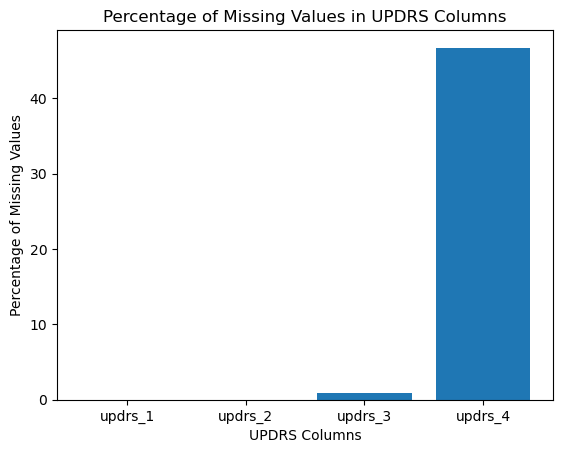

In [17]:
# get the number of null values in each updrs column
updrs_missing_vals = 100 * full_train_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].isnull().sum() / len(full_train_df)

plt.bar(updrs_missing_vals.index, updrs_missing_vals.values)
plt.title('Percentage of Missing Values in UPDRS Columns')
plt.xlabel('UPDRS Columns')
plt.ylabel('Percentage of Missing Values')
plt.show()

## What is the Correlation between UPDRS?

In [20]:
# get the correlation between the updrs columns
updrs_corr = full_train_df[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].corr()
updrs_corr

,updrs_1,updrs_2,updrs_3,updrs_4
updrs_1,1.000000,0.655220,0.454813,0.449881
updrs_2,0.655220,1.000000,0.766299,0.405150
updrs_3,0.454813,0.766299,1.000000,0.245145
updrs_4,0.449881,0.405150,0.245145,1.000000


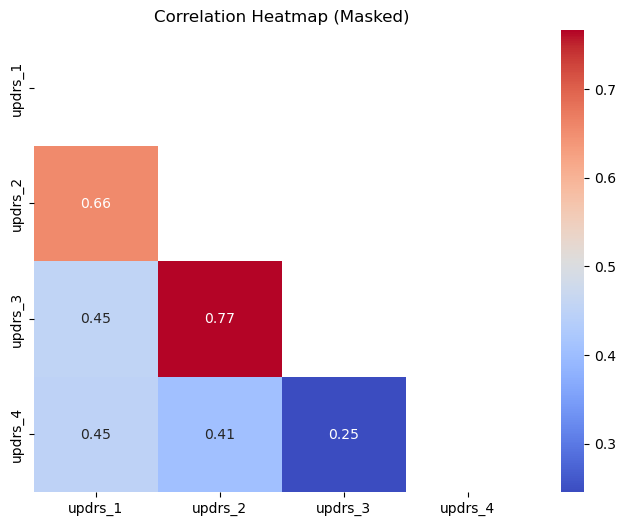

In [24]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(updrs_corr, dtype=bool))

# Create the heatmap with masked upper triangle
plt.figure(figsize=(8, 6))
sns.heatmap(updrs_corr, annot=True, cmap="coolwarm", mask=mask)

# Add title and show the plot
plt.title("Correlation Heatmap (Masked)")
plt.show()

#### UPDRS 2 and UPDRS 3 actually have a strong correlation

## Are the categorical values also correlated?
- updrs 1 categorical ratings: 10 and below is mild, 11 to 21 is moderate, 22 and above is severe
- updrs 2 categorical ratings: 12 and below is mild, 13 to 29 is moderate, 30 and above is severe
- updrs 3 categorical ratings: 32 and below is mild, 33 to 58 is moderate, 59 and above is severe

In [27]:
# apply the categorical ratings where 0 is mild and 1 is moderate/severe
full_train_df["updrs_1_cat"] = np.where(full_train_df["updrs_1"] <= 10, 0, 1)
full_train_df["updrs_2_cat"] = np.where(full_train_df["updrs_2"] <= 12, 0, 1)
full_train_df["updrs_3_cat"] = np.where(full_train_df["updrs_3"] <= 32, 0, 1)



In [28]:
# get the correlation between the categorical updrs columns
updrs_cat_corr = full_train_df[['updrs_1_cat', 'updrs_2_cat', 'updrs_3_cat']].corr()
updrs_cat_corr

,updrs_1_cat,updrs_2_cat,updrs_3_cat
updrs_1_cat,1.000000,0.549091,0.266134
updrs_2_cat,0.549091,1.000000,0.451403
updrs_3_cat,0.266134,0.451403,1.000000


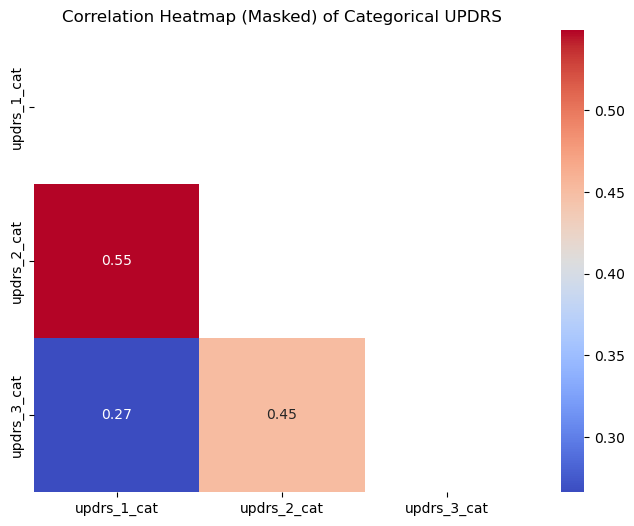

In [36]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(updrs_cat_corr, dtype=bool))

# Create the heatmap with masked upper triangle
plt.figure(figsize=(8, 6))
sns.heatmap(updrs_cat_corr, annot=True, cmap="coolwarm", mask=mask)

# Add title and show the plot
plt.title("Correlation Heatmap (Masked) of Categorical UPDRS")
plt.show()

## What about the corelation between the Max UPDRS value for a patient?

In [34]:
# get the max updrs score for each patient
max_updrs_df = full_train_df.groupby(['patient_id'])[['updrs_1_cat', 'updrs_2_cat', 'updrs_3_cat']].max().reset_index()
max_updrs_df.columns = ['patient_id', 'max_updrs_1_cat', 'max_updrs_2_cat', 'max_updrs_3_cat']

# get the correlation between the categorical updrs columns
max_updrs_corr = max_updrs_df[['max_updrs_1_cat', 'max_updrs_2_cat', 'max_updrs_3_cat']].corr()  

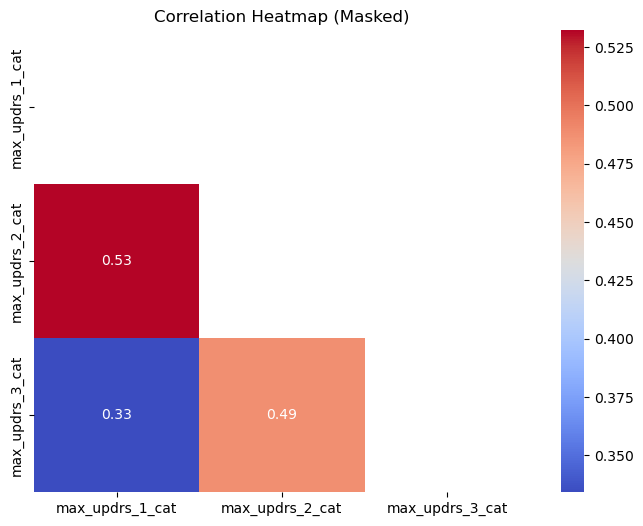

In [35]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(max_updrs_corr, dtype=bool))

# Create the heatmap with masked upper triangle
plt.figure(figsize=(8, 6))
sns.heatmap(max_updrs_corr, annot=True, cmap="coolwarm", mask=mask)

# Add title and show the plot
plt.title("Correlation Heatmap (Masked) of Max UPDRS Scores")
plt.show()